In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ['nodisease', 'kdisease']

brfssdata = pd.read_csv('C:/Users/sarwa/OneDrive/Documents/SPU/New folder/BRFSS_kidney2018_short.csv')

In [2]:
brfssdata.isnull().sum()
brfssdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437500 entries, 0 to 437499
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STATE     437500 non-null  float64
 1   EXERANY2  437500 non-null  int64  
 2   SLEPTIM1  437500 non-null  int64  
 3   ADDEPEV2  437500 non-null  int64  
 4   SEX1      437500 non-null  int64  
 5   EDUCA     437500 non-null  int64  
 6   EMPLOY1   437500 non-null  int64  
 7   SMOKE100  437500 non-null  int64  
 8   SMOKDAY2  437500 non-null  int64  
 9   AVEDRNK2  437500 non-null  int64  
 10  RACEGR3   437500 non-null  int64  
 11  BMI5      437500 non-null  int64  
 12  _BMI5     437500 non-null  int64  
 13  CHCKDNY1  437500 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 46.7 MB


In [3]:

count_class_0, count_class_1, count_class_2, count_class_7, count_class_9 = brfssdata.CHCKDNY1.value_counts()

kdisease = brfssdata[brfssdata['CHCKDNY1']==1]
nodisease = brfssdata[brfssdata['CHCKDNY1']==2]




In [4]:
kdisease = brfssdata[brfssdata['CHCKDNY1']==1]
nodisease = brfssdata[brfssdata['CHCKDNY1']==2]
nodisease_under = nodisease.sample(16000)

In [5]:
nodisease.shape

(419167, 14)

In [6]:
df_test_under = pd.concat([nodisease_under, kdisease], axis=0)
df_test_under.CHCKDNY1.value_counts()

1    16647
2    16000
Name: CHCKDNY1, dtype: int64

In [7]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 253414 to 437424
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     32647 non-null  float64
 1   EXERANY2  32647 non-null  int64  
 2   SLEPTIM1  32647 non-null  int64  
 3   ADDEPEV2  32647 non-null  int64  
 4   SEX1      32647 non-null  int64  
 5   EDUCA     32647 non-null  int64  
 6   EMPLOY1   32647 non-null  int64  
 7   SMOKE100  32647 non-null  int64  
 8   SMOKDAY2  32647 non-null  int64  
 9   AVEDRNK2  32647 non-null  int64  
 10  RACEGR3   32647 non-null  int64  
 11  BMI5      32647 non-null  int64  
 12  _BMI5     32647 non-null  int64  
 13  CHCKDNY1  32647 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.7 MB


In [8]:
df_test_under['CHCKDNY1'] = df_test_under['CHCKDNY1'].astype('category')
df_test_under['RACEGR3'] = df_test_under['RACEGR3'].astype('category')

In [9]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 253414 to 437424
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATE     32647 non-null  float64 
 1   EXERANY2  32647 non-null  int64   
 2   SLEPTIM1  32647 non-null  int64   
 3   ADDEPEV2  32647 non-null  int64   
 4   SEX1      32647 non-null  int64   
 5   EDUCA     32647 non-null  int64   
 6   EMPLOY1   32647 non-null  int64   
 7   SMOKE100  32647 non-null  int64   
 8   SMOKDAY2  32647 non-null  int64   
 9   AVEDRNK2  32647 non-null  int64   
 10  RACEGR3   32647 non-null  category
 11  BMI5      32647 non-null  int64   
 12  _BMI5     32647 non-null  int64   
 13  CHCKDNY1  32647 non-null  category
dtypes: category(2), float64(1), int64(11)
memory usage: 3.3 MB


In [17]:

#convert to string and decode levels
df_test_under['strkidney'] = ["kdisease" if i==1 else "nodisease" for i in df_test_under.CHCKDNY1]
d = {1: 'white', 2: 'black', 3:'American Indian', 4:'Asian', 5:'Native Hawaiian', 9:'Other race'}
df_test_under['strrace']=[d.get(x, 'Multiracial') for x in df_test_under.RACEGR3]
d1 = {1: 'underweight', 2: 'Normal weight', 3:'Overweight'}
df_test_under['strbmi']=[d1.get(x, 'Obese') for x in df_test_under.BMI5]
df_test_under['strsex'] = ["male" if i==1 else "female" for i in df_test_under.SEX1]
d2 = {1: 'Never attend school', 2: 'elementary', 3: 'Some high school', 4: 'High school graduate', 5: 'Some college'}
df_test_under['stredu']=[d2.get(x, 'College graduate') for x in df_test_under.EDUCA]
d3={1:'Alabama', 2:'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Delaware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawai', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine',
24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota',28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada',
   33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota',
   47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 66:'Guam', 72:'Puerto Rico'}
df_test_under['EXERANY2'] = ["Physical Activity/Exercise" if i==1 else "No Physical Activity/Exercise" for i in df_test_under.EXERANY2]

In [11]:


df_test_under.CHCKDNY1.value_counts()

1    16647
2    16000
Name: CHCKDNY1, dtype: int64

In [20]:
df_test_under.info()
df_test_under['strrace'] = df_test_under['strrace'].astype('category')
df_test_under['strkidney'] = df_test_under['strkidney'].astype('category')
df_test_under['strbmi'] = df_test_under['strbmi'].astype('category')
df_test_under['strsex'] = df_test_under['strsex'].astype('category')
df_test_under['stredu'] = df_test_under['stredu'].astype('category')
df_test_under['EXERANY2'] = df_test_under['EXERANY2'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 253414 to 437424
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   STATE      32647 non-null  float64 
 1   EXERANY2   32647 non-null  object  
 2   SLEPTIM1   32647 non-null  int64   
 3   ADDEPEV2   32647 non-null  int64   
 4   SEX1       32647 non-null  int64   
 5   EDUCA      32647 non-null  int64   
 6   EMPLOY1    32647 non-null  int64   
 7   SMOKE100   32647 non-null  int64   
 8   SMOKDAY2   32647 non-null  int64   
 9   AVEDRNK2   32647 non-null  int64   
 10  RACEGR3    32647 non-null  category
 11  BMI5       32647 non-null  int64   
 12  _BMI5      32647 non-null  int64   
 13  CHCKDNY1   32647 non-null  category
 14  strkidney  32647 non-null  category
 15  strrace    32647 non-null  category
 16  strbmi     32647 non-null  category
 17  strsex     32647 non-null  category
 18  stredu     32647 non-null  category
dtypes: category(7), flo

In [21]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 253414 to 437424
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   STATE      32647 non-null  float64 
 1   EXERANY2   32647 non-null  category
 2   SLEPTIM1   32647 non-null  int64   
 3   ADDEPEV2   32647 non-null  int64   
 4   SEX1       32647 non-null  int64   
 5   EDUCA      32647 non-null  int64   
 6   EMPLOY1    32647 non-null  int64   
 7   SMOKE100   32647 non-null  int64   
 8   SMOKDAY2   32647 non-null  int64   
 9   AVEDRNK2   32647 non-null  int64   
 10  RACEGR3    32647 non-null  category
 11  BMI5       32647 non-null  int64   
 12  _BMI5      32647 non-null  int64   
 13  CHCKDNY1   32647 non-null  category
 14  strkidney  32647 non-null  category
 15  strrace    32647 non-null  category
 16  strbmi     32647 non-null  category
 17  strsex     32647 non-null  category
 18  stredu     32647 non-null  category
dtypes: category(8), flo

In [22]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [23]:

pip install ggplot


Note: you may need to restart the kernel to use updated packages.


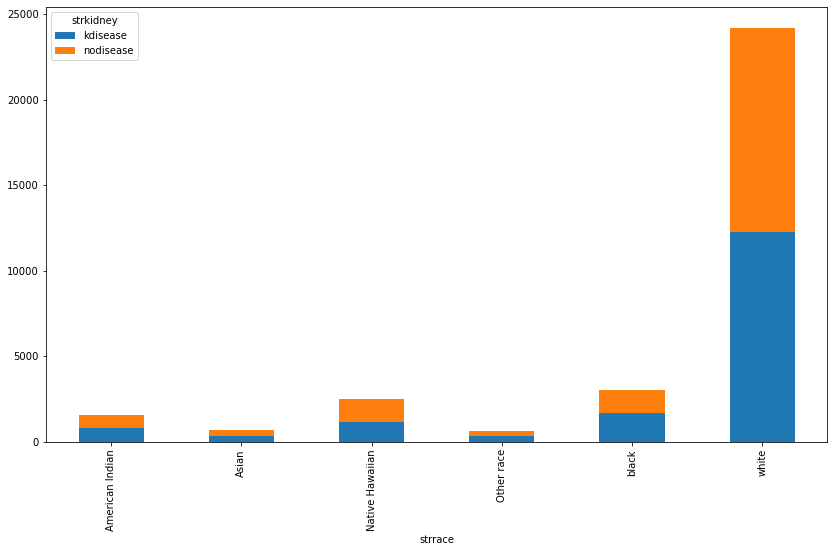

In [24]:
df_test_under.groupby(['strrace', 'strkidney'])['strrace'].count().unstack().plot.bar(stacked=True)
plt.show()

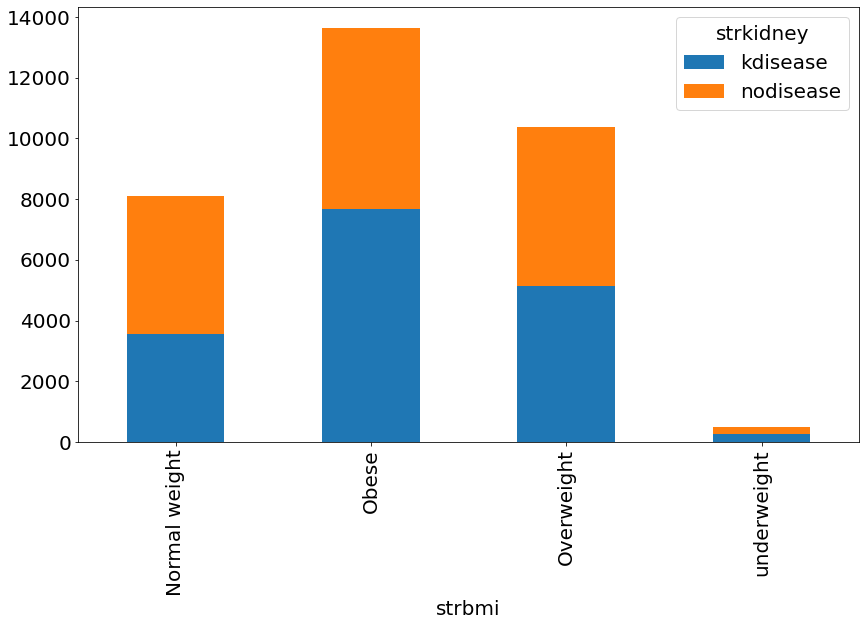

In [20]:
plt.rcParams.update({'font.size': 20})
df_test_under.groupby(['strbmi', 'strkidney'])['strbmi'].count().unstack().plot.bar(stacked=True)
plt.show()

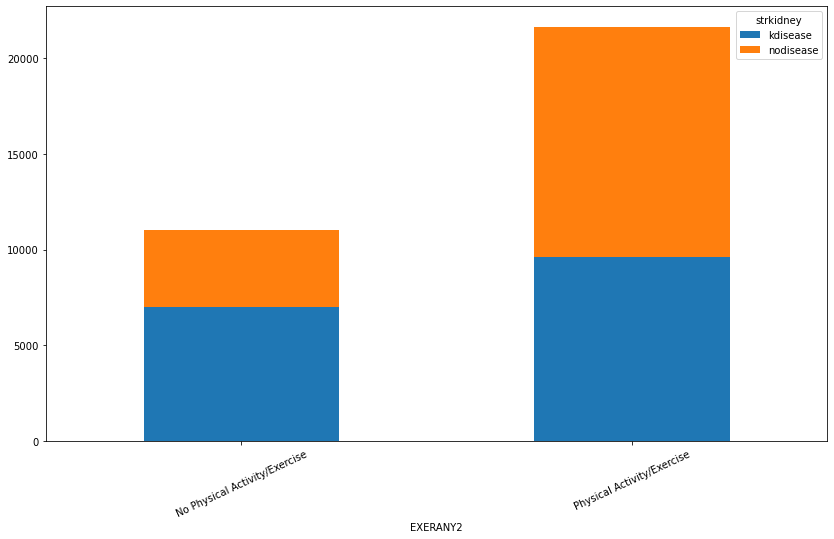

In [28]:
df_test_under.groupby(['EXERANY2', 'strkidney'])['EXERANY2'].count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=25)
plt.show()

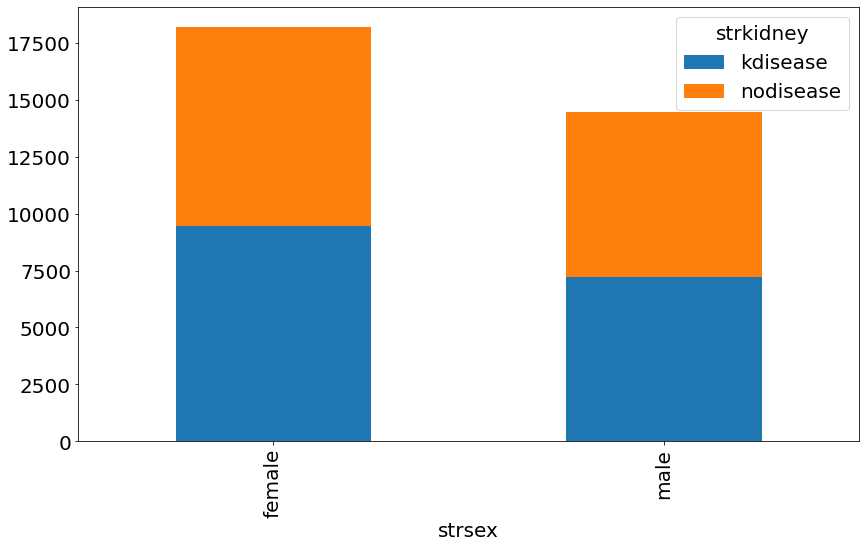

In [21]:
df_test_under.groupby(['strsex', 'strkidney'])['strsex'].count().unstack().plot.bar(stacked=True)
plt.show()


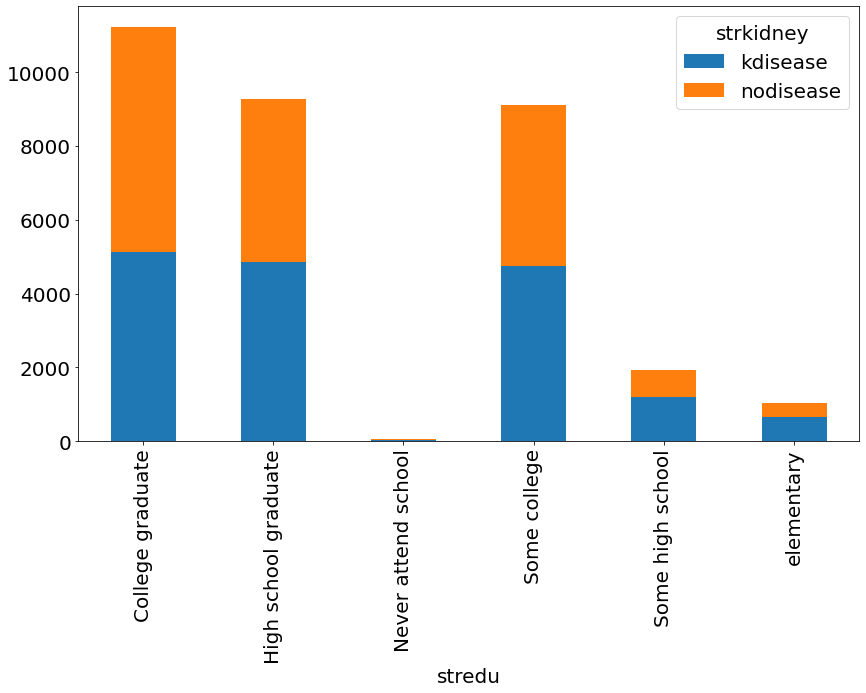

In [22]:
df_test_under.groupby(['stredu', 'strkidney'])['stredu'].count().unstack().plot.bar(stacked=True)
plt.show()

Text(0.5, 1.0, 'Gender Distribution for No Disease')

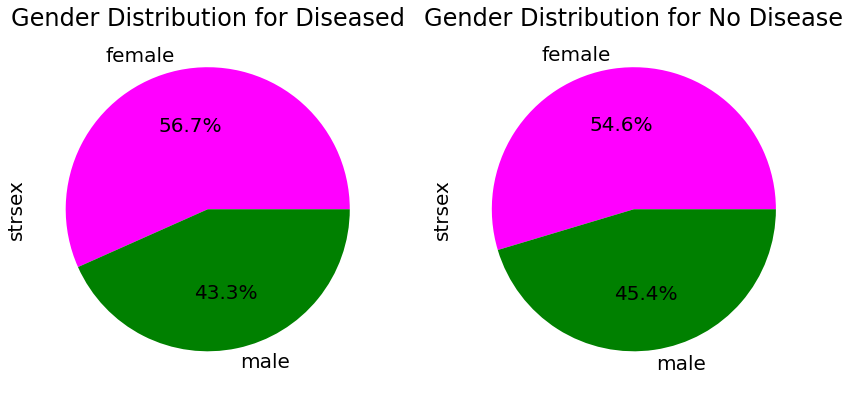

In [23]:
plt.rcParams.update({'font.size': 20})
plt.subplot(1,2,1);df_test_under.strsex[df_test_under.CHCKDNY1==1].value_counts().plot(kind='pie', colors=["magenta", "green"], autopct='%1.1f%%').set_title("Gender Distribution for Diseased")
plt.subplot(1,2,2);df_test_under.strsex[df_test_under.CHCKDNY1==2].value_counts().plot(kind='pie', colors=["magenta", "green"], autopct='%1.1f%%').set_title("Gender Distribution for No Disease")

In [24]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 32252 to 437424
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   EXERANY2   32647 non-null  int64   
 1   SLEPTIM1   32647 non-null  int64   
 2   ADDEPEV2   32647 non-null  int64   
 3   SEX1       32647 non-null  int64   
 4   EDUCA      32647 non-null  int64   
 5   EMPLOY1    32647 non-null  int64   
 6   SMOKE100   32647 non-null  int64   
 7   SMOKDAY2   32647 non-null  int64   
 8   AVEDRNK2   32647 non-null  int64   
 9   RACEGR3    32647 non-null  category
 10  BMI5       32647 non-null  int64   
 11  _BMI5      32647 non-null  int64   
 12  CHCKDNY1   32647 non-null  category
 13  strkidney  32647 non-null  category
 14  strrace    32647 non-null  category
 15  strbmi     32647 non-null  category
 16  strsex     32647 non-null  category
 17  stredu     32647 non-null  category
dtypes: category(7), int64(11)
memory usage: 3.2 MB


In [25]:
df_nostring = df_test_under.iloc[:,0:13]
df_nostring.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 32252 to 437424
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   EXERANY2  32647 non-null  int64   
 1   SLEPTIM1  32647 non-null  int64   
 2   ADDEPEV2  32647 non-null  int64   
 3   SEX1      32647 non-null  int64   
 4   EDUCA     32647 non-null  int64   
 5   EMPLOY1   32647 non-null  int64   
 6   SMOKE100  32647 non-null  int64   
 7   SMOKDAY2  32647 non-null  int64   
 8   AVEDRNK2  32647 non-null  int64   
 9   RACEGR3   32647 non-null  category
 10  BMI5      32647 non-null  int64   
 11  _BMI5     32647 non-null  int64   
 12  CHCKDNY1  32647 non-null  category
dtypes: category(2), int64(11)
memory usage: 3.1 MB


In [26]:
X = df_nostring.drop('CHCKDNY1', axis=1)
Y = df_nostring['CHCKDNY1']

In [27]:
names = list(df_nostring.columns.drop('CHCKDNY1'))

In [28]:
inp_df = pd.DataFrame(X, columns=names)
inp_df.head()

,EXERANY2,SLEPTIM1,ADDEPEV2,SEX1,EDUCA,EMPLOY1,SMOKE100,SMOKDAY2,AVEDRNK2,RACEGR3,BMI5,_BMI5
32252,1,8,1,1,4,2,2,0,0,1,4,3905
167411,1,8,2,1,6,7,2,0,1,1,4,5168
350716,1,7,2,1,5,1,2,0,0,1,0,0
318385,1,9,2,2,6,1,2,0,0,1,2,1949
259850,1,7,2,2,6,1,2,0,1,1,2,2090


In [29]:
import statsmodels.api as sm



for i in range(0, len(names)):
    y=inp_df.loc[:, inp_df.columns == names[i]]
    x=inp_df.loc[:, inp_df.columns != names[i]]
    model = sm.OLS(y,x.astype(float))
    results = model.fit()
    rsq = results.rsquared
    vif=round(1/(1-rsq),2)
    print(
        "R Square value of {} column is {} keeping all other columns as features". format(
             names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
           names[i], vif)
    )

R Square value of EXERANY2 column is 0.86 keeping all other columns as features
Variance Inflation Factor of EXERANY2 column is 6.97 

R Square value of SLEPTIM1 column is 0.44 keeping all other columns as features
Variance Inflation Factor of SLEPTIM1 column is 1.78 

R Square value of ADDEPEV2 column is 0.89 keeping all other columns as features
Variance Inflation Factor of ADDEPEV2 column is 8.81 

R Square value of SEX1 column is 0.86 keeping all other columns as features
Variance Inflation Factor of SEX1 column is 7.13 

R Square value of EDUCA column is 0.93 keeping all other columns as features
Variance Inflation Factor of EDUCA column is 14.05 

R Square value of EMPLOY1 column is 0.75 keeping all other columns as features
Variance Inflation Factor of EMPLOY1 column is 3.95 

R Square value of SMOKE100 column is 0.88 keeping all other columns as features
Variance Inflation Factor of SMOKE100 column is 8.39 

R Square value of SMOKDAY2 column is 0.61 keeping all other columns as

In [30]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 32252 to 437424
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   EXERANY2   32647 non-null  int64   
 1   SLEPTIM1   32647 non-null  int64   
 2   ADDEPEV2   32647 non-null  int64   
 3   SEX1       32647 non-null  int64   
 4   EDUCA      32647 non-null  int64   
 5   EMPLOY1    32647 non-null  int64   
 6   SMOKE100   32647 non-null  int64   
 7   SMOKDAY2   32647 non-null  int64   
 8   AVEDRNK2   32647 non-null  int64   
 9   RACEGR3    32647 non-null  category
 10  BMI5       32647 non-null  int64   
 11  _BMI5      32647 non-null  int64   
 12  CHCKDNY1   32647 non-null  category
 13  strkidney  32647 non-null  category
 14  strrace    32647 non-null  category
 15  strbmi     32647 non-null  category
 16  strsex     32647 non-null  category
 17  stredu     32647 non-null  category
dtypes: category(7), int64(11)
memory usage: 3.2 MB


In [31]:
df_test_under["count_kidney"] = df_test_under.strkidney.value_counts()


In [32]:
df_test_under["CHCKDNY1"]=df_test_under["CHCKDNY1"].astype('float')


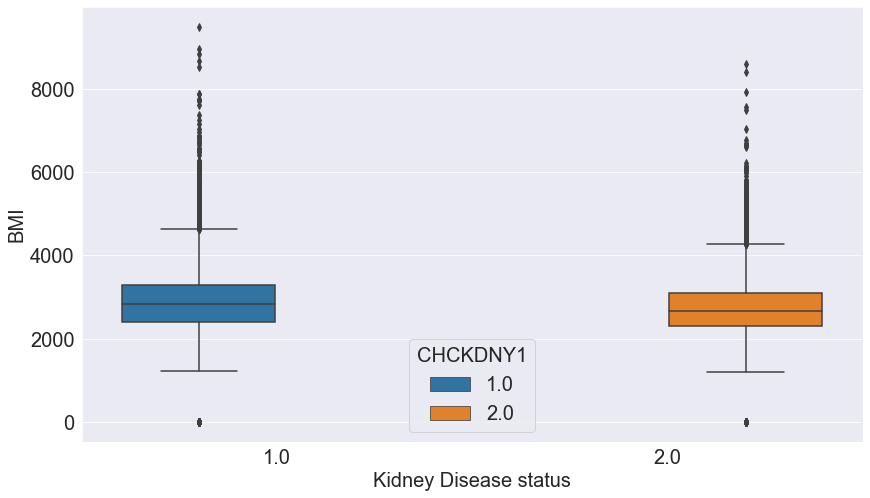

In [33]:
sns.set_style("darkgrid")


box_plot = sns.boxplot(x="CHCKDNY1", y="_BMI5", hue="CHCKDNY1", data=df_test_under).set(xlabel="Kidney Disease status", ylabel="BMI")






In [34]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32647 entries, 32252 to 437424
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   EXERANY2      32647 non-null  int64   
 1   SLEPTIM1      32647 non-null  int64   
 2   ADDEPEV2      32647 non-null  int64   
 3   SEX1          32647 non-null  int64   
 4   EDUCA         32647 non-null  int64   
 5   EMPLOY1       32647 non-null  int64   
 6   SMOKE100      32647 non-null  int64   
 7   SMOKDAY2      32647 non-null  int64   
 8   AVEDRNK2      32647 non-null  int64   
 9   RACEGR3       32647 non-null  category
 10  BMI5          32647 non-null  int64   
 11  _BMI5         32647 non-null  int64   
 12  CHCKDNY1      32647 non-null  float64 
 13  strkidney     32647 non-null  category
 14  strrace       32647 non-null  category
 15  strbmi        32647 non-null  category
 16  strsex        32647 non-null  category
 17  stredu        32647 non-null  category
 18  c

In [35]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [36]:
X = df_nostring.drop('CHCKDNY1', axis=1)
Y = df_nostring['CHCKDNY1']

In [37]:
#Split dataset into training and test object
x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=1)

In [38]:
x_train.shape

(24485, 12)

In [39]:
#Create a Logistic Regression Object, perform Logistic Regression

log_reg=LogisticRegression(max_iter=1200000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1200000)

In [40]:
y_pred=log_reg.predict(x_test)

In [41]:
print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred)*100)

[[3019 1037]
 [1720 2386]]
66.22151433472189


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.74      0.69      4056
           2       0.70      0.58      0.63      4106

    accuracy                           0.66      8162
   macro avg       0.67      0.66      0.66      8162
weighted avg       0.67      0.66      0.66      8162



In [43]:
Y.head()

32252     2
167411    2
350716    2
318385    2
259850    2
Name: CHCKDNY1, dtype: category
Categories (2, int64): [1, 2]

In [44]:
X1 = X.drop(['EDUCA', 'BMI5', '_BMI5', 'SMOKDAY2', 'EMPLOY1', 'ADDEPEV2'], axis=1)

In [45]:
X1.head()

,EXERANY2,SLEPTIM1,SEX1,SMOKE100,AVEDRNK2,RACEGR3
32252,1,8,1,2,0,1
167411,1,8,1,2,1,1
350716,1,7,1,2,0,1
318385,1,9,2,2,0,1
259850,1,7,2,2,1,1


In [46]:
x_train, x_test, y_train, y_test=train_test_split(X1, Y, random_state=1)

In [47]:
log_reg=LogisticRegression(max_iter=1200000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1200000)

In [48]:
y_pred=log_reg.predict(x_test)

In [49]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

[[1737 2319]
 [1055 3051]]
58.662092624356774


In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz


In [57]:
Y =  Y.astype('float')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=52, stratify=Y)

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)


In [58]:
Y.value_counts()

1.0    16647
2.0    16000
Name: CHCKDNY1, dtype: int64

In [53]:
#Visualize the model
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=X1.columns, class_names=['disease', 'no disease'], filled = True))
display(SVG(graph.pipe(format='svg')))



ValueError: Length of feature_names, 6 does not match number of features, 12

In [54]:
graph.format = 'png'
graph.render('dtree_render',view=True)

NameError: name 'graph' is not defined

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_predict=model.predict(x_test)

print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[2962 2033]
 [2048 2752]]
58.3358856559469


In [60]:
from sklearn.svm import SVC
model_svm = SVC(C=100)

In [61]:
X = df_nostring.drop('CHCKDNY1', axis=1)
Y = df_nostring['CHCKDNY1']

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

In [62]:
model_svm.fit(x_train, y_train)

SVC(C=100)

In [63]:
y_predict=model_svm.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)
model_svm.score(x_test, y_test)

[[2363  935]
 [1402 1830]]
64.2113323124043


0.6421133231240429

In [57]:
#no. of grids in rf
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

#no. of features to consider at every split
max_features=['auto', 'sqrt']

#maximum number of levels in tree

max_depth = [2,4]

#minimum number of samples required to split a node

min_samples_split = [2,5]

#minimum number of samples required at each leaf node

min_samples_leaf = [1, 2]

#method of selecting samples for training each tree

bootstrap = [True, False]



In [58]:
#create the random grid

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [66]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose=2, n_jobs=4)


In [67]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   27.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   50.6s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [68]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 72}

In [69]:
rf_grid.score(x_train, y_train)
rf_grid.score(x_test, y_test)

0.6863705972434916

In [70]:
y_predict=rf_grid.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[2371  931]
 [1117 2111]]
68.63705972434916


In [71]:
#Try different hyperparameters

#no. of grids in rf
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]

criterion = ['gini', 'entropy']

#no. of features to consider at every split
max_features=['auto', 'sqrt']

#maximum number of levels in tree

max_depth = [3,5,7,9,10]

#minimum number of samples required to split a node

min_samples_split = [2,4,6]

#minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

#method of selecting samples for training each tree

bootstrap = [True, False]

In [72]:
#create the new random grid

param_grid = {'n_estimators': n_estimators,
              'criterion' : criterion,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 7, 9, 10], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [73]:
rf_grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose=2, n_jobs=4)

In [74]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\sarwa\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   37.7s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 14.5

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [75]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 70}

In [76]:
rf_grid.score(x_train, y_train)
rf_grid.score(x_test, y_test)

0.6903522205206738

In [77]:
y_pred = rf_grid.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.74      0.71      3302
           2       0.71      0.64      0.67      3228

    accuracy                           0.69      6530
   macro avg       0.69      0.69      0.69      6530
weighted avg       0.69      0.69      0.69      6530



In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [62]:
nb.score(x_train, y_train)
nb.score(x_test, y_test)

0.6540581929555895

In [64]:
y_pred = nb.predict(x_test)
print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred)*100)

[[1938 1364]
 [ 895 2333]]
65.40581929555896


In [84]:
#prediction probabilities
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_grid.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)

In [85]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [88]:
print(r_auc)
print(rf_auc)
print(nb_auc)

0.5
0.7405908873652458
0.7109046218979108


In [90]:
y_pred_rf=rf_grid.predict(x_test)
y_pred_nb=nb.predict(x_test)
y_pred_svm=model_svm.predict(x_test)

In [91]:
from sklearn.metrics import roc_curve, auc


rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf, pos_label=2)
auc_rf = auc(rf_fpr, rf_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm, pos_label=2)
auc_svm = auc(svm_fpr, svm_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb, pos_label=2)
auc_nb = auc(nb_fpr, nb_tpr)

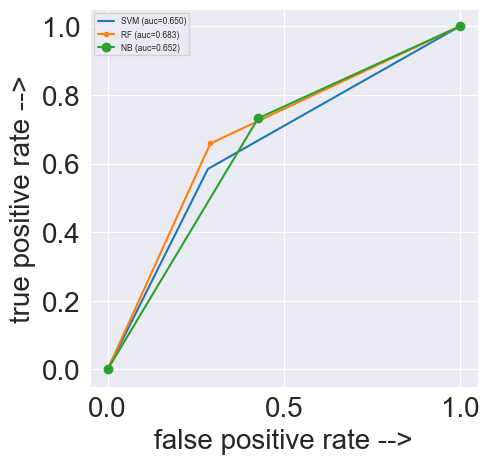

In [95]:
#plot roc curve
plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc=%0.3f)'% auc_svm)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (auc=%0.3f)'% auc_rf)
plt.plot(nb_fpr, nb_tpr, marker='o', label='NB (auc=%0.3f)'% auc_nb)

plt.xlabel('false positive rate -->')
plt.ylabel('true positive rate -->')
plt.legend(loc=2, fontsize=6)
